### Исследования продаж видеоигр

#### Задача:

По предоставленным данным по продажам видеоигр до 2016 года, их жанрам, платформам, оценкам пользователей и экспертов выявить закономерности, определяющие успешные продажи игр и спланировать рекламную кампанию на 2017 год.

#### План: <a name="home"></a>

1. [Открытие файла с данными и изучение общей информации.](#step1) 
2. [Подготовка данных:](#step2)
    + Приведение названий столбцов к нижнему регистру
    + Рассчёт суммарных продаж по всем регионам и добавление в таблицу
    + Работа с пропусками
    + Работа с типами данных
3. [Исследовательский анализ данных:](#step3)
    + Количество игр по годам
    + Анализ продаж по платформам
    + Определение актуального для исследования периода данных
    + Выбор потенциально прибыльных платформ
    + Построение "ящика с усами" для продаж игр по платформам
    + Оценка влияния отзывов пользователей  критиков
    + Анализ игр разных жанров
4. [Составление портрета пользователя каждого региона (NA, EU, JP):](#step4)
    + Самые популярные платформы
    + Самые популярные жанры
    + Влияние рейтинга ESRB на продажи в отдельном регионе
5. [Проверка гипотез:](#step5)
    + Средние пользовательские рейтинги платформ Xbox One и PC одинковые
    + Средние пользовательские рейтинги жанров Action и Sports разные
6. [Вывод](#step6)

### 1. Открытие файла с данными изучение общей информации <a name="step1"></a>

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
pd.options.display.max_columns = 40
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.info()
df.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14249,An American Tail: Fievel's Gold Rush,GBA,2002.0,Platform,0.02,0.01,0.00,0.00,NaN,NaN,NaN
15071,AMF Xtreme Bowling,PS2,2006.0,Sports,0.01,0.01,0.00,0.00,30.0,4.2,E
847,Battlefield 4,XOne,2013.0,Shooter,1.25,0.58,0.00,0.19,81.0,6.6,M
9771,Mytran Wars,PSP,2009.0,Strategy,0.08,0.02,0.00,0.02,68.0,8.8,T
6685,Scooby-Doo! Unmasked,PS2,2005.0,Platform,0.12,0.10,0.00,0.03,NaN,NaN,NaN
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M
6644,Medal of Honor European Assault,GC,2005.0,Shooter,0.19,0.05,0.00,0.01,71.0,7.9,T
14252,Swords,Wii,NaN,Fighting,0.03,0.00,0.00,0.00,NaN,tbd,T
2287,Operation Flashpoint: Dragon Rising,PS3,2009.0,Shooter,0.23,0.46,0.05,0.17,76.0,6.5,M
6582,Secret Weapons Over Normandy,XB,2003.0,Simulation,0.19,0.05,0.00,0.01,77.0,8.8,T


Всего в датасете 11 столбцов:
   + Name — название игры
   + Platform — платформа
   + Year_of_Release — год выпуска
   + Genre — жанр игры
   + NA_sales — продажи в Северной Америке (миллионы проданных копий)
   + EU_sales — продажи в Европе (миллионы проданных копий)
   + JP_sales — продажи в Японии (миллионы проданных копий)
   + Other_sales — продажи в других странах (миллионы проданных копий)
   + Critic_Score — оценка критиков (максимум 100)
   + User_Score — оценка пользователей (максимум 10)
   + Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Названия столбцов необходимо привести к нижнему регистру. Столбец 'year_of_release' привести к типу datetime, 'user_score' к типу float. Пропуски в столбце 'year_of_release' составляют менее 2% от всего датасета, поэтому их удалим. Пропуски в столбцах 'name' и 'genre' скорее всего в одинаковых строках и их всего по 2, поэтому их тоже удалим. Пропуски в столбцах 'critic_score', 'user_score' и 'rating' более подробно рассмотрим на этапе обработки пропусков.

[В начало](#home)

### 2. Подготовка данных <a name="step2"></a>

In [4]:
df.columns = df.columns.str.lower() #приведём названия столбцов к нижнему регистру

In [5]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']#добавляем столбец с общими продажами по регионам

In [6]:
df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)#удаляем пропуски в столбцах 'name', 'genre' и 'year_of_release'

Изучим пропуски в столбцах 'critic_score', 'user_score' и 'rating'.

In [7]:
df.loc[(df['critic_score'].isnull()) | (df['user_score'].isnull()) | (df['rating'].isnull())].head(40) #выведем часть строк с пропусками на экран

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,23.09
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,20.62
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,18.24
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,18.14
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,17.28


In [8]:
df.loc[(df['critic_score'].isnull()) | (df['user_score'].isnull())].head(40) 
#посмотрим на 40 строк таблицы, где есть пропуск либо в 'critic_score', либо 'user_score'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,23.09
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,20.62
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,18.24
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,18.14
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,17.28


Пропуски в значениях столбцов 'critic_score' или в 'user_score' могли образоваться либо потому не проводилась оценка критиками или пользователями, либо из-за ошибок при выгрузке данных.

In [9]:
df.loc[((df['critic_score'].notnull()) | (df['user_score'].notnull())) & (df['year_of_release'] < 1999)]['platform'].unique()
#посмотрим, какие игры, выпущенные до 1999 года имеют оценки либо критиков, либо пользователей

array(['PS', 'PC'], dtype=object)

До 1999 года оценка критиков либо пользователей есть у игр, выходивших на платформах PC или PS. Скорее всего, это произошло потому что игры на других платформах тогда не оценивались

In [10]:
df.loc[(df['critic_score'].isnull()) & (df['user_score'].isnull())].groupby('platform')['name'].count()
#посмотрим количество строк с пропущенными данными по платформам

platform
2600    116
3DO       3
3DS     287
DC       38
DS      861
GB       97
GBA     298
GC       85
GEN      27
GG        1
N64     316
NES      98
NG       12
PC      145
PCFX      1
PS      980
PS2     671
PS3     358
PS4     128
PSP     656
PSV     280
SAT     173
SCD       6
SNES    239
TG16      2
WS        6
Wii     308
WiiU     42
X360    200
XB       85
XOne     53
Name: name, dtype: int64

In [11]:
df.loc[(df['critic_score'].isna()) | (df['user_score'].isna())].shape[0]

8494

In [12]:
df.query('user_score == 0 or critic_score == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


По общей таблице не прослеживается связи между пропущенными данными в оценках пользователей и критиков ни с платформами, ни с
годом выпуска, ни с продажами. Следственно, пропуски появились ввиду ошибок при выгрузке. Заменить на среднее или медиану будет неправильным решением, так как пропусков чуть меньше, чем 50% и это сильно исказит данные, поэтому можно просто заменить их на маркеры, например на "0".

In [13]:
df['critic_score'] = df['critic_score'].fillna(0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


In [15]:
df.query('user_score == "tbd"') #посмотрим датасет со значением 'tbd' в столбце 'user_score'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,0.0,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,0.0,tbd,T,2.81
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,0.0,tbd,E,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,0.01
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,0.01
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,0.01
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,0.0,tbd,E,0.01


In [16]:
df.query('user_score == "tbd"')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()
#посмотрим, какие продажи по регионам игр со значением 'tbd' в столбце 'user_score'

na_sales       298.28
eu_sales       103.77
jp_sales         6.61
other_sales     37.79
total_sales    446.45
dtype: float64

In [17]:
df.query('user_score == "tbd"')['jp_sales'].value_counts()

0.00    2294
0.01      16
0.02      11
0.03      11
0.05       7
0.06       6
0.04       5
0.09       3
0.16       2
0.08       2
0.12       2
0.18       2
0.11       2
0.25       2
0.13       2
0.10       1
0.15       1
0.86       1
0.14       1
0.20       1
0.26       1
0.47       1
0.17       1
0.31       1
Name: jp_sales, dtype: int64

Значения 'tbd' в столбце 'user_score' преимущественно у тех игр, у которых продажи по Японии равны 0.

Так как 'tbd' значит, что рейтинг неопределён, можно считать, что это пропуск и заменяем его на 0.

In [18]:
df['user_score'] = df['user_score'].str.replace('tbd', '0')
df['user_score'] = df['user_score'].fillna(0)

In [19]:
df['user_score'] = df['user_score'].astype('float') #приведём столбец 'user_score' к дробному типу

Пропуски в рейтинге могли произойти результате ошибок в выгрузке данных. Посмотрим, можно ли заменить пропуски, в зависимости от жанра игры.

In [20]:
df.pivot_table(index=['rating', 'genre'], values='name', aggfunc='count')
#посчитаем количество игр разных жанров по каждому возрастному рейтингу

name
rating genre             
AO     Action           1
E      Action         410
       Adventure      159
       Fighting         8
       Misc           449
       Platform       354
       Puzzle         284
       Racing         576
       Role-Playing    83
       Shooter         47
       Simulation     321
       Sports        1162
       Strategy        68
E10+   Action         468
       Adventure       67
       Fighting        19
       Misc           166
       Platform       141
       Puzzle          42
       Racing          95
       Role-Playing   111
       Shooter         56
       Simulation      47
       Sports         105
       Strategy        76
EC     Action           1
       Adventure        2
       Misc             5
K-A    Misc             1
       Strategy         2
M      Action         596
       Adventure       98
       Fighting        48
       Misc            13
       Platform         3
       Racing          18
       Role-Playing   161
       Shooter        553
       Simulation       5
       Sports          16
       Strategy        25
RP     Strategy         1
T      Action         670
       Adventure      114
       Fighting       357
       Misc           228
       Platform        63
       Puzzle          10
       Racing         167
       Role-Playing   415
       Shooter        340
       Simulation     186
       Sports         195
       Strategy       160

Закономерности не прослеживается, у каждого жанра в равной степени могут быть разные возрастные ограничения. Поэтому тоже заменим на маркер, например, 'NA'

In [21]:
df['rating'] = df['rating'].fillna('NA')

In [22]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year #приведём год выпуска к типу даты

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


[В начало](#home)

### 3. Исследовательский анализ данных <a name="step3"></a>

In [24]:
amt_year = df.groupby('year_of_release')['name'].count() #сгруппируем данные по количеству вышедших игр по годам

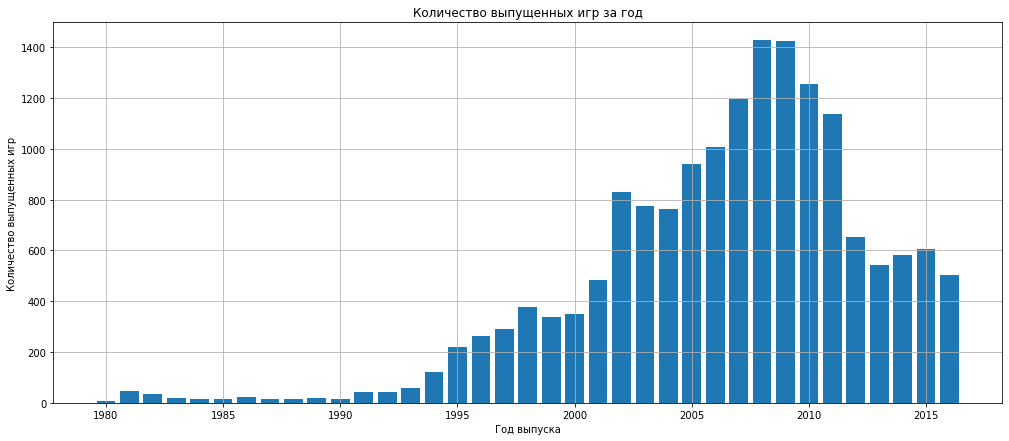

In [25]:
plt.figure(figsize =(17, 7))
plt.bar(amt_year.index, amt_year)
plt.grid()
plt.title('Количество выпущенных игр за год')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.show()
#построим график распределения выпуска игр по годам

До 2008 года количество выпущенных игр росло. В 2008 достигло своего пика и пошло на спад. Наибольший рост количества игр был в 2002 году. Количество игр увеличилось на 60% по сравнению с 2001. Данные до 2002 года можем отбросить, так как там уже и неактуальные платформы и количество игр значительно выросло.

In [26]:
platforms = df['platform'].unique() #создадим список платформ

In [27]:
platform_amtgames = df.pivot_table(index=['platform', 'year_of_release'], aggfunc={'name':'count', 'total_sales':'sum'}).reset_index()
platform_amtgames.columns = ['platform', 'year_of_release', 'amount', 'total_sales']

Построим график по количеству выпущенных игр по годам для каждой платформы

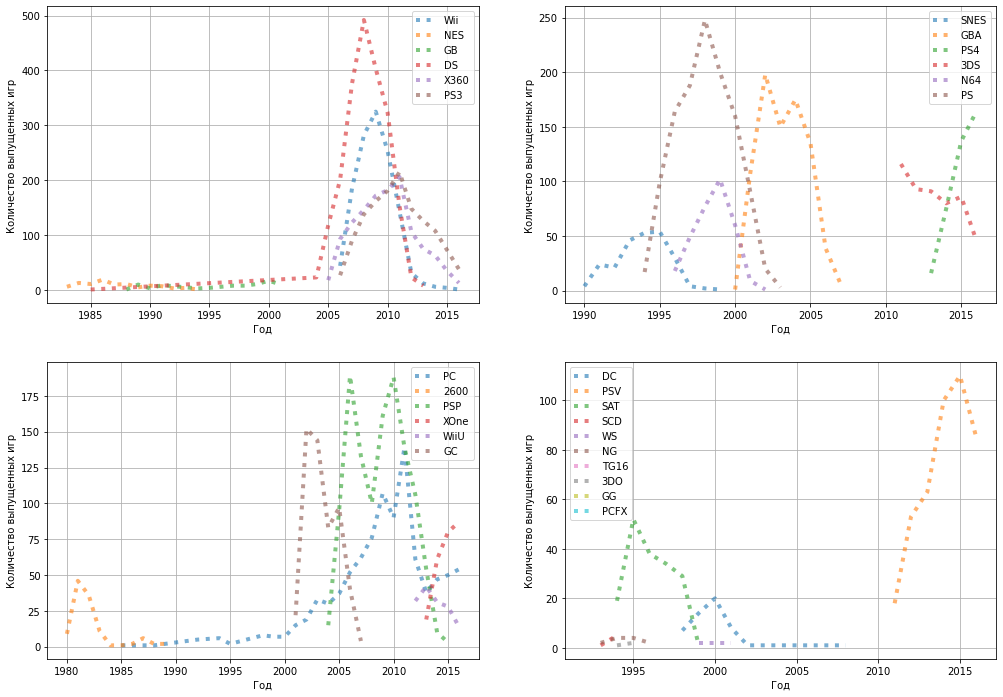

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize =(17, 12))
for i in platforms[0:6]:
    axes[0,0].plot(platform_amtgames.query('platform == @i')['year_of_release'],
                 platform_amtgames.query('platform == @i')['amount'], 
                 label=i, 
                 alpha=0.6,
                 ls=':',
                 lw=4
                )
    axes[0,0].legend()
axes[0,0].grid()
axes[0,0].set_ylabel('Количество выпущенных игр')
axes[0,0].set_xlabel('Год')
for i in platforms[7:13]:
    axes[0,1].plot(platform_amtgames.query('platform == @i')['year_of_release'],
                 platform_amtgames.query('platform == @i')['amount'], 
                 label=i, 
                 alpha=0.6,
                 ls=':',
                 lw=4
                )
    axes[0,1].legend()
axes[0,1].grid()
axes[0,1].set_ylabel('Количество выпущенных игр')
axes[0,1].set_xlabel('Год')
for i in platforms[14:20]:
    axes[1,0].plot(platform_amtgames.query('platform == @i')['year_of_release'],
                 platform_amtgames.query('platform == @i')['amount'], 
                 label=i, 
                 alpha=0.6,
                 ls=':',
                 lw=4
                )
    axes[1,0].legend()
axes[1,0].grid()
axes[1,0].set_ylabel('Количество выпущенных игр')
axes[1,0].set_xlabel('Год')
for i in platforms[21:]:
    axes[1,1].plot(platform_amtgames.query('platform == @i')['year_of_release'],
                 platform_amtgames.query('platform == @i')['amount'], 
                 label=i, 
                 alpha=0.6,
                 ls=':',
                 lw=4
                )
    axes[1,1].legend()
axes[1,1].grid()
axes[1,1].set_ylabel('Количество выпущенных игр')
axes[1,1].set_xlabel('Год')
plt.show()

У платформ XOne и PS4 идёт рост количества выпущенных игр. Также и у PC очередной подъём. Количество выпущенных игр на 3DS, PSV и WiiU, но всё же ещё будут выпускаться в 2017. А вот для остальных платформ, скорее всего игры уже не будут выпускаться в следующем году. За исключением, возможно, PS3.

Примерная продолжительность жизни платформы - 10 лет. Исключение составляет PC. PC является актуальной платформой для всего времени. Наибольшее число игр для PC было выпущено в 2011 году.

In [29]:
platform_sales = df.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').reset_index()
platform_sales.sort_values(by='total_sales', ascending=False).head(10)
#посмотрим на платформы с наибольшими общими продажами

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Большая разница в продажах между PS и PS4. Построим распределение по топ-6 платформ по продажам по годам.

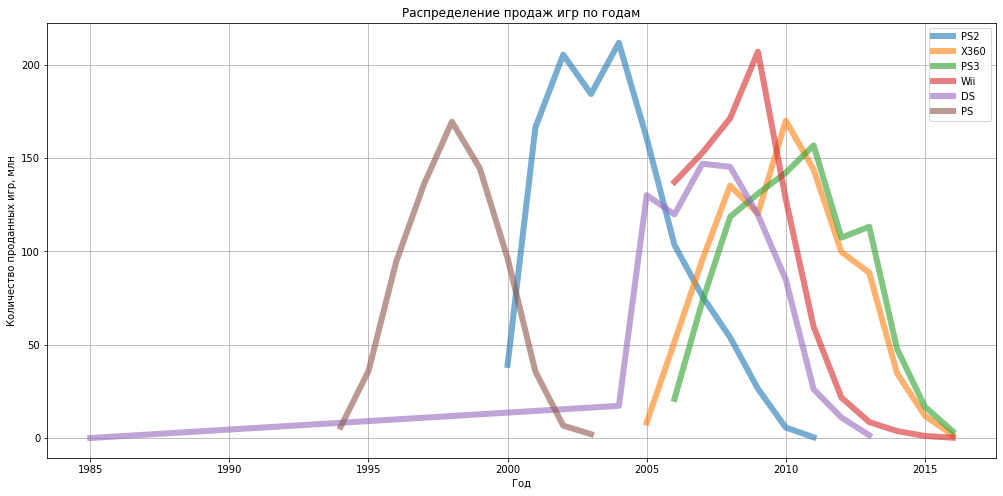

In [30]:
fig, ax = plt.subplots(figsize=(17,8))
for i in platform_sales.sort_values(by='total_sales', ascending=False)['platform'].head(6):
    ax.plot(platform_amtgames.query('platform == @i')['year_of_release'],
            platform_amtgames.query('platform == @i')['total_sales'], 
            label=i, 
            alpha=0.6,
            ls='-',
            lw=6,
            )
    ax.legend()
ax.set_title('Распределение продаж игр по годам')
ax.grid()
ax.set_ylabel('Количество проданных игр, млн')
ax.set_xlabel('Год')
plt.show()

На этом графике тоже видно, что продолжительность жизни платформы около 10 лет. Все лидеры по продажам в 2016 уже практически не продавались.
На графике странная линия у продаж платформы "DS", нужно подробнее рассмотреть

In [31]:
df.query('platform == "DS" and year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0.0,0.0,NA,0.02


In [32]:
df.query('name == "Strongest Tokyo University Shogi DS"') #проверим, одна ли игра с таким названием

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0.0,0.0,NA,0.02


In [33]:
df = df.loc[df['name'] != 'Strongest Tokyo University Shogi DS'] #удаляем строку, так это ошибка в данных

С 2012 года количество выпущенных игр находятся примерно на одном уровне: без резких подъёмов или снижений. Также, учитывая, что последние из актуальных в 2017 году платформы появились в 2013 году, для прогноза на 2017 год возьмём данные за последние 4 года.

In [34]:
df_actual = df.loc[df['year_of_release'] >= 2013]

Построим график продаж по платформам по годам с 2013 года.

In [35]:
df_act_platform = df_actual.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index()
df_act_platform.columns = ['platform', 'year_of_release', 'total_sales']

In [36]:
df_act_platform.query('year_of_release == 2016').sort_values(by='total_sales', ascending=False)

,platform,year_of_release,total_sales
16,PS4,2016,69.25
39,XOne,2016,26.15
3,3DS,2016,15.14
8,PC,2016,5.25
31,WiiU,2016,4.60
23,PSV,2016,4.25
12,PS3,2016,3.60
35,X360,2016,1.52
27,Wii,2016,0.18


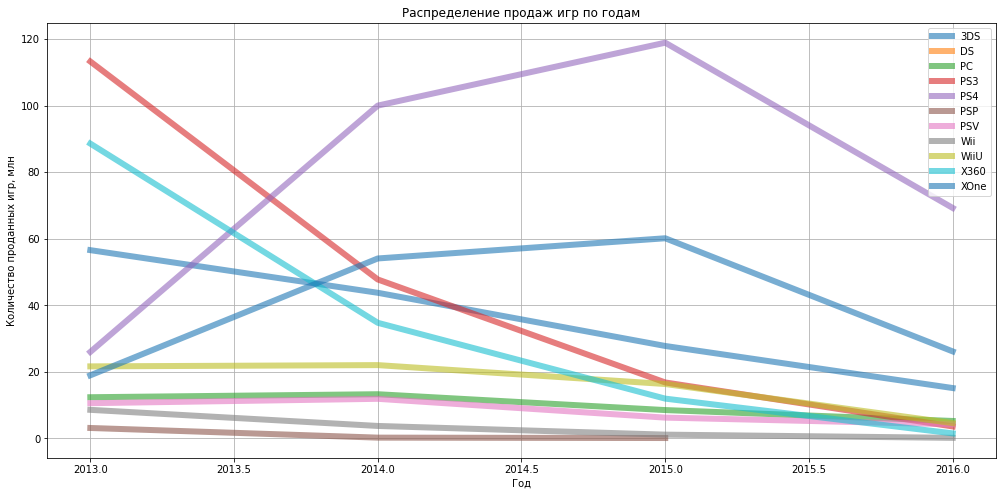

In [37]:
fig, ax = plt.subplots(figsize=(17,8))
for i in df_act_platform['platform'].unique():
    ax.plot(df_act_platform.query('platform == @i')['year_of_release'],
            df_act_platform.query('platform == @i')['total_sales'], 
            label=i, 
            alpha=0.6,
            ls='-',
            lw=6,
            )
    ax.legend()
ax.set_title('Распределение продаж игр по годам')
ax.grid()
ax.set_ylabel('Количество проданных игр, млн')
ax.set_xlabel('Год')
plt.show()

Продажи по всем платформам на спаде. Только продажи по платформе PC и PSV держатся примерно на одном уровне, но всё равно тенденция на спад. Для продаж в 2017 году я бы выделил 6 платформ: PS4, XOne, 3DS, WiiU, PC и PSV.

In [38]:
x_1 = df.loc[(df['platform'] == 'PS4') & (df['total_sales'] >= df.query('platform == "PS4"')['total_sales'].quantile(.05)) & (
df['total_sales'] <= df.query('platform == "PS4"')['total_sales'].quantile(.95))]

In [39]:
def box_plots(df, i):
    x_1 = df.loc[(df['platform'] == i) & (df['year_of_release'] >= 2012) & \
                 (df['total_sales'] >= df.query('platform == @i')['total_sales'].quantile(.05)) & \
                 (df['total_sales'] <= df.query('platform == @i')['total_sales'].quantile(.95))]
    plt.figure(figsize=(17,2))
    plt.boxplot(x_1['total_sales'],
            notch=True,
            sym='|',
            vert=False,
            widths=0.1,
            patch_artist=True
            )
    plt.title('Ящик с усами'+' '+i)
    plt.xlabel('Количество проданных копий, млн шт')
    plt.grid()
    plt.show()

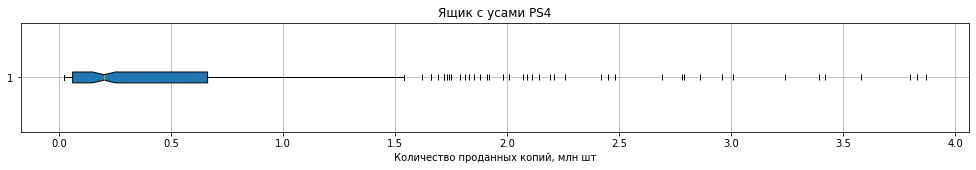

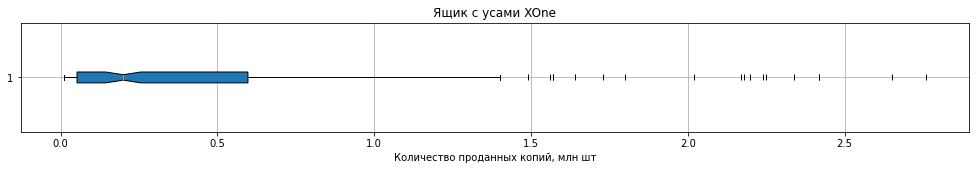

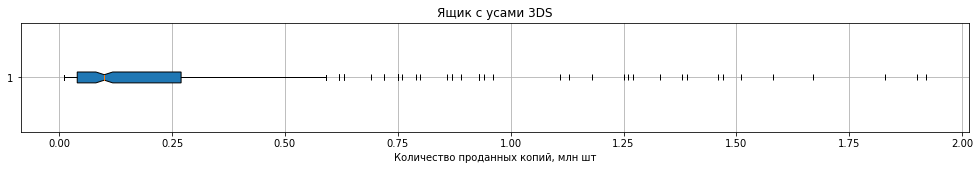

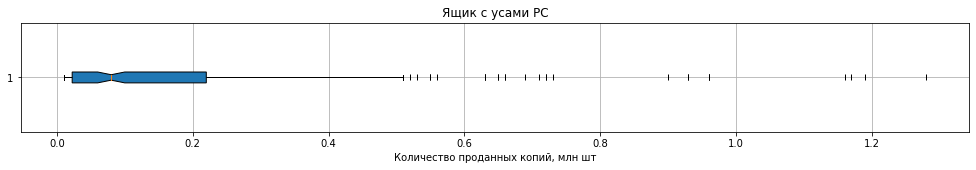

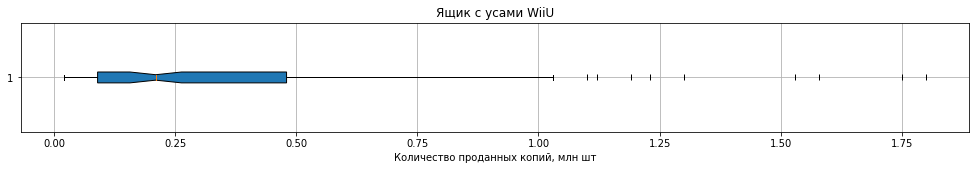

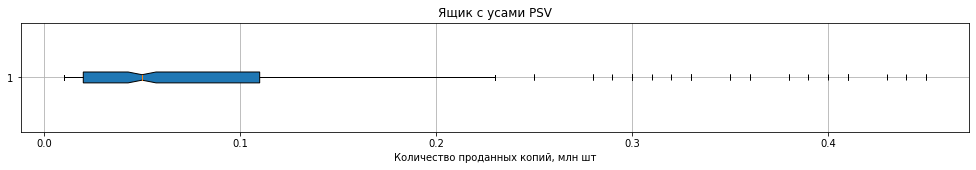

In [40]:
for i in df_act_platform.query('year_of_release == 2016').sort_values(by='total_sales', ascending=False)['platform'].head(6):
    box_plots(df, i)

Продажи по XOne и PS4 примерно одинаковые. 75% выпущенных игр продались до 0,6 млн копий, а медиана равна 0,2 млн копий. То есть, можно сказать, что это 2 самые популярные платформы. Однако, обращая внимание на то, что общее количество проданных игр PS4 в 2016 в 2 раза больше, чем XOne, можно сказать, что самой популярной платформой является PS4. За ними идёт WiiU, потом 3DS и PC. Однако, общие продажи за 2016 по 3DS выше, чем на WiiU. Самая непопуляная платформа из топ6 - это PSV

In [41]:
ps4 = df.loc[(df['platform'] == 'PS4') & (df['total_sales'] >= df.query('platform == "PS4"')['total_sales'].quantile(.05)) & (
df['total_sales'] <= df.query('platform == "PS4"')['total_sales'].quantile(.95))][['critic_score', 'user_score', 'total_sales']] 
#соберём таблицу о PS4 из оценок критиков и пользователей и общими продажами

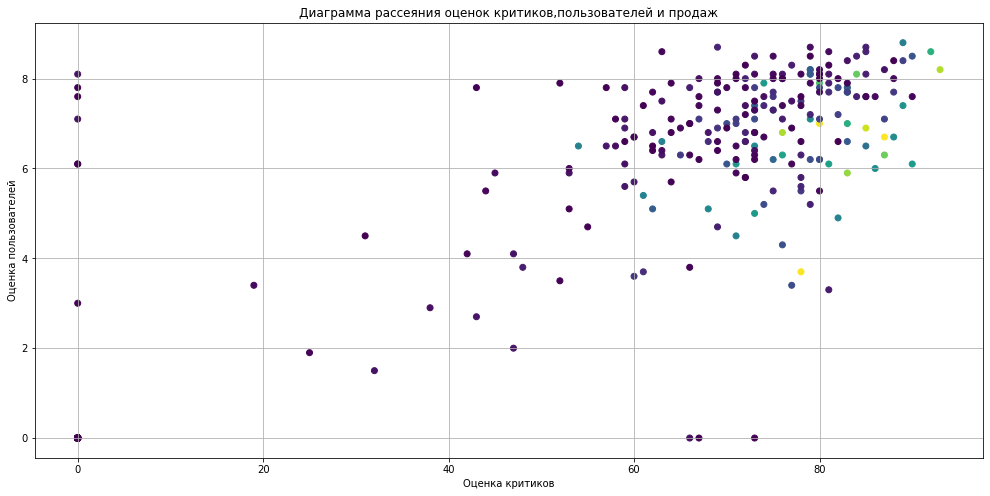

In [42]:
plt.figure(figsize=(17, 8))
plt.title('Диаграмма рассеяния оценок критиков,пользователей и продаж')
plt.ylabel('Оценка пользователей')
plt.xlabel('Оценка критиков')
plt.scatter(x=ps4['critic_score'], y=ps4['user_score'], c=ps4['total_sales'])
plt.grid()
#построим диаграмму рассеяния оценок критиков, пользователей и продаж

In [43]:
ps4.corr().style.background_gradient('coolwarm') #посмотрим корреляцию

,critic_score,user_score,total_sales
critic_score,1.000000,0.905440,0.304019
user_score,0.905440,1.000000,0.191750
total_sales,0.304019,0.191750,1.000000


По таблице корелляции видно, что между оценками пользователей и критиков прямая сильная зависимость, а между оценками и продажами прямая слабая зависимость. Однако, на графике видно, что с увеличением значения оценок количество продаж значительно растёт. Мы можем сказать, что оценки влияют на продажи.

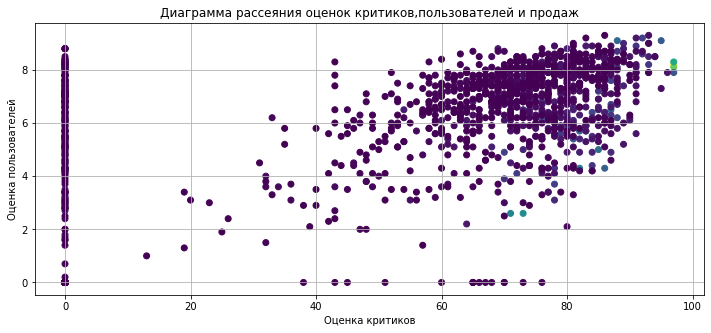

In [44]:
plt.figure(figsize=(12, 5))
plt.title('Диаграмма рассеяния оценок критиков,пользователей и продаж')
plt.ylabel('Оценка пользователей')
plt.xlabel('Оценка критиков')
plt.scatter(x=df_actual['critic_score'], y=df_actual['user_score'], c=df_actual['total_sales'])
plt.grid()
#построим диаграмму рассеяния оценок критиков, пользователей и продаж в общем по актуальному периоду

In [45]:
df_actual[['critic_score', 'user_score', 'total_sales']].corr().style.background_gradient('coolwarm') #посмотрим корреляцию

,critic_score,user_score,total_sales
critic_score,1.000000,0.813976,0.221094
user_score,0.813976,1.000000,0.152945
total_sales,0.221094,0.152945,1.000000


Общая картина такая же, как и по самой популярной платформе

In [46]:
genres = df_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index()
genres.columns = ['genre', 'total_sales']
#создадим таблицу с доходами по жанрам

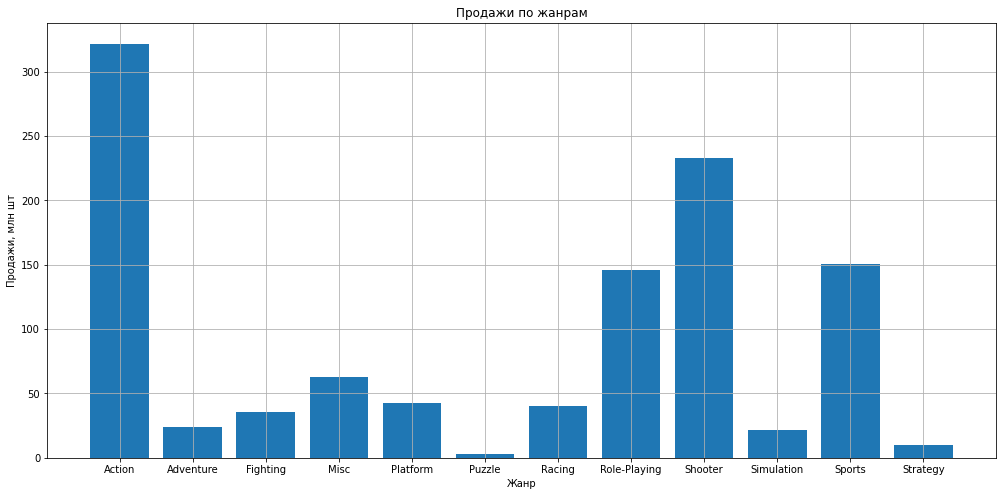

In [47]:
plt.figure(figsize=(17,8))
plt.bar(genres['genre'], genres['total_sales'])
plt.title('Продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн шт')
plt.grid()
plt.show()

Самый популярный жанр - это 'Action'. Хорошо продаются игры жанра 'Shooter'. Чуть хуже, но тоже вполне неплохие продажи у жанров 'Role-Playing' и 'Sports'. Эти 4 жанра далеко впереди по продажам по сравнению со всеми остальными.

У игр жанра 'Puzzle' очень плохие продажи.

[В начало](#home)

### 4. Составление портрета пользователя каждого региона (NA, EU, JP) <a name="step4"></a> 

In [48]:
region_platforms = df_actual.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
region_platforms.columns = ['platform', 'eu', 'jp', 'na']
#соберём таблицу по продажам игр по регионам по платформам

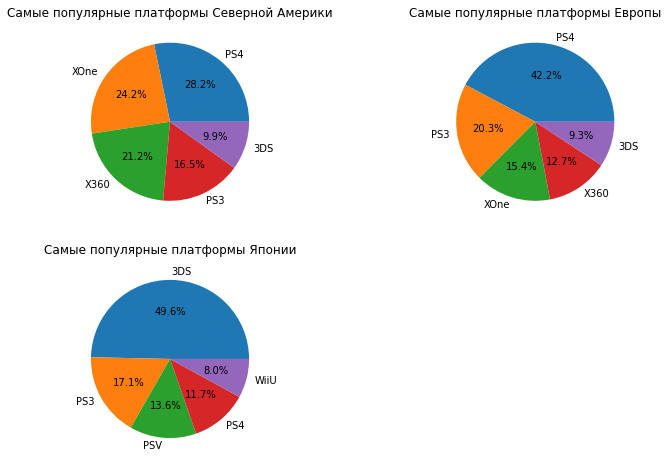

In [49]:
fig = plt.figure(figsize=(12,8))
ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_1.set_title('Самые популярные платформы Северной Америки')
ax_1.pie(region_platforms['na'].sort_values(ascending=False).head(), autopct='%1.1f%%', \
         labels=region_platforms.sort_values(by='na', ascending=False)['platform'].head().to_list())
ax_2.set_title('Самые популярные платформы Европы')
ax_2.pie(region_platforms['eu'].sort_values(ascending=False).head(), autopct='%1.1f%%', \
         labels=region_platforms.sort_values(by='eu', ascending=False)['platform'].head().to_list())
ax_3.set_title('Самые популярные платформы Японии')
ax_3.pie(region_platforms['jp'].sort_values(ascending=False).head(), autopct='%1.1f%%', \
         labels=region_platforms.sort_values(by='jp', ascending=False)['platform'].head().to_list())
plt.show()
#выведем соотношение продаж по регионам по платформам

В Европе самыми популярными платформами являются 2 поколения PS: PS3 и PS4. Они занимают более 60% рынка.

В Японии наибольшей популярностью пользуется портативная 3DS, занимая 50%. Также популярна портативна консоль от Sony - PS Vita. Совсем отсутствует XOne, так как в Европе эта платформа не получила широкого распространения. Новое поколение PS - PS4 проигрывет в популярности предыдущему PS3. То есть, среди топ-5 самых популярных платформ в Японии представители Sony и Nintendo. Скорее всего, это связано с тем, что эти корпорации основаны и находятся в Японии.

В Америке, в отличие от Европы, продажи игр для XOne и PS4 примерно на одном уровне, с небольшим перевесом в сторону консоли от Sony. Следом идёт X360, которая отстаёт ненамного.

In [50]:
region_genres = df_actual.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
region_genres.columns = ['genre', 'eu', 'jp', 'na']
#соберём таблицу по продажам игр по регионам по жанрам

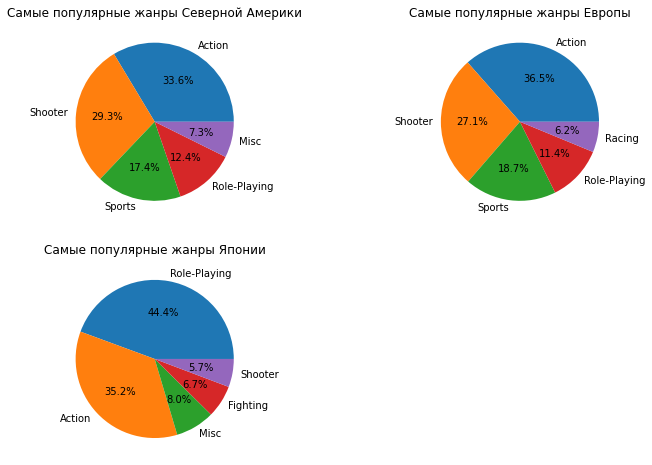

In [51]:
fig = plt.figure(figsize=(12,8))
ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_1.set_title('Самые популярные жанры Северной Америки')
ax_1.pie(region_genres['na'].sort_values(ascending=False).head(), autopct='%1.1f%%', \
         labels=region_genres.sort_values(by='na', ascending=False)['genre'].head().to_list())
ax_2.set_title('Самые популярные жанры Европы')
ax_2.pie(region_genres['eu'].sort_values(ascending=False).head(), autopct='%1.1f%%', \
         labels=region_genres.sort_values(by='eu', ascending=False)['genre'].head().to_list())
ax_3.set_title('Самые популярные жанры Японии')
ax_3.pie(region_genres['jp'].sort_values(ascending=False).head(), autopct='%1.1f%%', \
         labels=region_genres.sort_values(by='jp', ascending=False)['genre'].head().to_list())
plt.show()
#выведем соотношение продаж по регионам по жанрам

В Северной Америке и Европе диаграммы похожие. Самыми популярными жанрами являются 'Action' и 'Shooter'. Единственное различие, что в Европе в топ-5 по популярности входят игры жанра Racing, а в Америке - Misc.

В Японии самые популярные ролевые игры и экшн. А вот "Шутеры" на последнем месте по популярности среди топ-5. Также в топ-5 входят игры жанра Fighting.

In [52]:
region_rating = df_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
region_rating.columns = ['rating', 'eu', 'jp', 'na']
#соберём таблицу по продажам по регионам для рейтинга

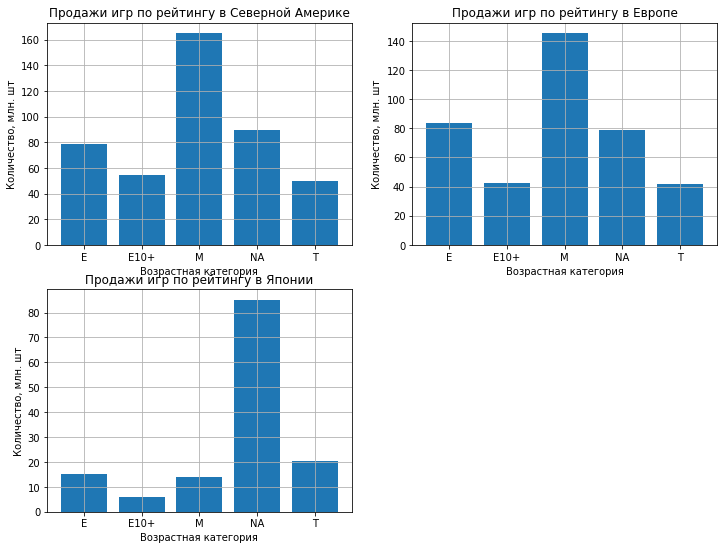

In [53]:
fig = plt.figure(figsize=(12,9))
ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_1.set_title('Продажи игр по рейтингу в Северной Америке')
ax_1.set_xlabel('Возрастная категория')
ax_1.set_ylabel('Количество, млн. шт')
ax_1.bar(region_rating['rating'], region_rating['na'])
ax_1.grid()
ax_2.set_title('Продажи игр по рейтингу в Европе')
ax_2.set_xlabel('Возрастная категория')
ax_2.set_ylabel('Количество, млн. шт')
ax_2.bar(region_rating['rating'], region_rating['eu'])
ax_2.grid()
ax_3.set_title('Продажи игр по рейтингу в Японии')
ax_3.set_xlabel('Возрастная категория')
ax_3.set_ylabel('Количество, млн. шт')
ax_3.bar(region_rating['rating'], region_rating['jp'])
ax_3.grid()
plt.show()
#выведем количесвто продаж игра разных рейтингов по регионам

В Северной Америке и Европе рынки схожи между собой. Сильно выделяются продажи игр для людей старше 17 лет, остальные примерно на одном уровне. Но не стоит забывать о пропусках. Если бы пропуски в столбце были одного значения из списка, это бы сильно поменяло картину по продажам, например, если бы у всех пропусков было значение 'E', то продажи категорий "Для взрослых" и "Для всех" были бы одного уровня.

В Японии очень много пропущенных значений. Возможно, в Европе своя система рейтингов для возрастных категорий, отличная от Европы и Северной Америки. Поэтому, по Японии мы не можем сделать выводы о зависимости продаж от возрастного рейтинга.

[В начало](#home)

### 5. Проверка гипотез <a name="step5"></a>

######  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [54]:
xone_score = df_actual.query('platform == "XOne"')['user_score'] #пользовательские оценки Xbox One
pc_score = df_actual.query('platform == "PC"')['user_score'] #пользовательские оценки PC

In [55]:
display('Средний пользовательский рейтинг платформы Xbox One равен {:.2f}'.format(xone_score.mean()))
display('Средний пользовательский рейтинг платформы PC равен {:.2f}'.format(pc_score.mean()))

'Средний пользовательский рейтинг платформы Xbox One равен 4.81'

'Средний пользовательский рейтинг платформы PC равен 5.14'

В первую очередь, сформулируем нулевую H₀ и альтернативную гипотезу H₁. Нулевая гипотеза H₀ будет звучать так: средний пользовательский рейтинг платформ Xbox One и PC одинаковый, так как H₀ всегда формулируется так, чтобы использовать знак равенства. Соответственно, альтернативная гипотеза H₁, исходя из H₀ будет такой: средний пользовательский рейтинг платформ Xbox One и PC различный.

Критерий для проверки гипотезы возьмём критический уровень значимости (alpha), равный 1%, так как вероятность попадания в эту зону крайне мала, а значит, при верной нулевой гипотезе, p-value должен быть больше этого значения.

Определяем параметр equal_var. Сначала посмотрим на нормальность совокупности, откуда взяты выборки с помощью теста Шапиро-Уилка.

In [56]:
st.shapiro(xone_score)

ShapiroResult(statistic=0.8119599223136902, pvalue=1.3962291255703894e-16)

Так как p-value меньше alpha, мы не можем сказать, что совокупность распределена нормально. Следовательно, для определения параметра equal_var применяем тест Левена.

In [57]:
st.levene(xone_score, pc_score)

LeveneResult(statistic=0.7108939276995212, pvalue=0.39961164671217064)

P-value больше alpha, значит дисперсии не гомогенны, то есть, параметр equal_var используем со значением False.

In [58]:
st.ttest_ind(xone_score, pc_score, equal_var=False)

Ttest_indResult(statistic=-1.166665516616711, pvalue=0.24400999542744453)

P-value больше alpha. Значит, что, хотя и разница между средними оценками составляет 0,3, мы не можем отвергнуть нулевую гипотезу, так как с вероятностью 24% мы можем получить такое или большее различие случайно. То есть, не можем сказать, что средний рейтинг игр платформ Xbox One и PC одинаковый.

###### Средние пользовательские рейтинги жанров Action и Sports разные

In [59]:
action_score = df_actual.query('genre == "Action"')['user_score'] #пользовательские оценки Action
sports_score = df_actual.query('genre == "Sports"')['user_score'] #пользовательские оценки Sports

In [60]:
display('Средний пользовательский рейтинг игр жанра Action равен {:.2f}'.format(action_score.mean()))
display('Средний пользовательский рейтинг игр жанра Sports равен {:.2f}'.format(sports_score.mean()))

'Средний пользовательский рейтинг игр жанра Action равен 3.47'

'Средний пользовательский рейтинг игр жанра Sports равен 3.92'

Сформулируем нулевую H₀ и альтернативную гипотезу H₁. Нулевая гипотеза H₀ будет звучать так: средний пользовательский рейтинг игр жанров Action и Sports одинаковый, так как H₀ всегда формулируется так, чтобы использовать знак равенства. Соответственно, альтернативная гипотеза H₁, исходя из H₀ будет такой: средний пользовательский рейтинг игр жанров Action и Sports различный.

Критерий для проверки гипотезы возьмём критический уровень значимости (alpha), равный 1%, так как вероятность попадания в эту зону крайне мала, а значит, при верной нулевой гипотезе, p-value должен быть больше этого значения.

При проверке предыдущей гипотезы мы выяснили, что не можем говорить о нормальном распределении совокупности, следовательно для определения параметра equal_var используем тест Левена.

In [61]:
st.levene(action_score, sports_score)

LeveneResult(statistic=146.41045985544824, pvalue=1.659050606374074e-31)

В этом случае p-value меньше alpha, значит значение параметра equal_var будет True.

In [62]:
st.ttest_ind(action_score, sports_score)

Ttest_indResult(statistic=-1.693167376704153, pvalue=0.0907420711340326)

Так как мы alpha взяли 0.01, p-value получилось больше. Следовательно, нулевую гипотезу о том, что средний пользовательский рейтинг игр жанров Action и Sports одинаковый, мы не можем отвергнуть.

[В начало](#home)

### Вывод <a name="step6"></a>

Исследуя данные по играм разных платформ за предыдущие годы мы пришли к выводу, что:
1. Актуальными платформами в 2017 году будут  PS4, XOne, 3DS, WiiU, PC и PSV. При том, что в Европе и Северной Америке будут популярнее стационарные консоли: Xbox One и PS4, а в Японии портативные консоли в сумме занимают более 70%. Среди стационарных консолей PS4 и Xbox One в Европе и Америке распределение происходит по-разному: в Европе приставка от Sony в 2 раза популярнее Xbox One, а в Америке они примерно на одном уровне.
2. Популярность жанром в Европе и Америке примерно одинаковая. Самым популярным жанром является Action, затем идёт Shooter. Вместе они занимают более 60% продаж среди топ-5 жанров. Затем идёт Sports, и с небольшим отставанием жанр ролевых игр. В Японии картина обратная. Самым популярным жанром является жанр ролевых игр, затем идёт жанр Экшн. Эти два жанра далеко впереди по сравнению с остальными. В сумме у этих двух жанров почти 80% продаж среди топ-5 популярных жанров.
3. Лидирующие позиции по продажам в Европе и Америке занимают игры с возрастным ограничением "Только для взрослых". Остальные категории примерно на одном уровне. Но здесь есть нюанс, что много пропусков в категории. Возможно, этоn пропуск образовался ввиду того, что это категория без возрастных ограничений, то есть "М", тогда продажи по категории "Только для взрослых" и "Без возрастных ограничений" примерно на одном уровне. По Японии ничего сказать нельзя, так как там много пропусков в этом столбце. Скорее всего, это произошло потому, что в Японии своя система установки возрастной категории.
4. Зависимость продаж от оценок пользователей и критиков. Хотя и по таблице получается, что корреляция слабая, на графике мы видим, что чем выше оценка, тем продаж больше. Соответсвенно, делаем вывод, что продажи напрямую зависят от оценок критиков и пользователей.

Следовательно. В 2017 году нужно сделать основной упор на:
+ Северная Америка: игры на консолях PS4, Xbox One и жанры Экшн, Шутер и Спорт с возрастным ограничением "Только для взрослых" и "Для всех" и на игры с наибольшим рейтингом оценок пользователей и критиков
+ Европа: в большей степени на игры на PS4, затем на Xbox One. Жанры, возрастные ограничения и оценки так же, как и в Америке.
+ Япония: игры на портативных консолях 3DS и PSV и жанры ролевых игр и Экшн с наибольшими оценками пользователей и критиков. Платформа Xbox One в Японии непопулярна.